# Шаг 4. Открываю файлы с данными, изучаю общую информацию, выполняю задание

In [68]:
#импортирую необходимые для выполнения проекта библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [69]:
data_aircraft = pd.read_csv('/datasets/query_1.csv')
data_aircraft.info()
data_aircraft

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [70]:
data_flight = pd.read_csv('/datasets/query_3.csv')
data_flight.info()
data_flight

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


После импорта файлов и изучения информации в них отмечу, что типы данных на корректны и дальнейшей предобработки данных не требуется.

Выбираю ТОП-10 городов по кол-ву рейсов и строю график по новой таблице.

In [71]:
data_flight = data_flight.sort_values(by = 'average_flights', ascending = False)
data_flight_top = data_flight.head(10)
data_flight_top

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


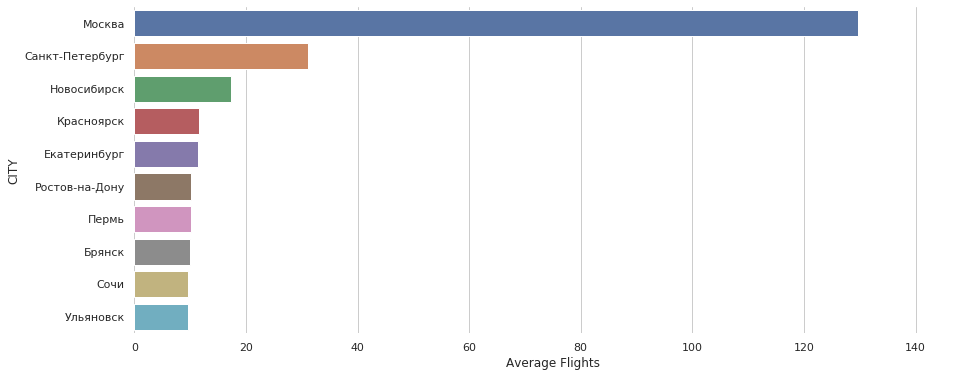

In [72]:
#Задаю стиль сетки
sns.set(style="whitegrid")
#Задаю размер графика
f, ax = plt.subplots(figsize=(15, 6))
#Рисую график
sns.barplot( x = 'average_flights', y = 'city', data = data_flight_top, orient = 'h')
#Задаю названия осей
ax.set(xlim=(0, 150), ylabel="CITY",
       xlabel="Average Flights")
sns.despine(left=True, bottom=True)

По данному графику можно сделать вывод, что количество рейсов больше всего наблюдается в крупных городах страны(с большей численностью населения, высоким уровнем инфраструктуры и тд)

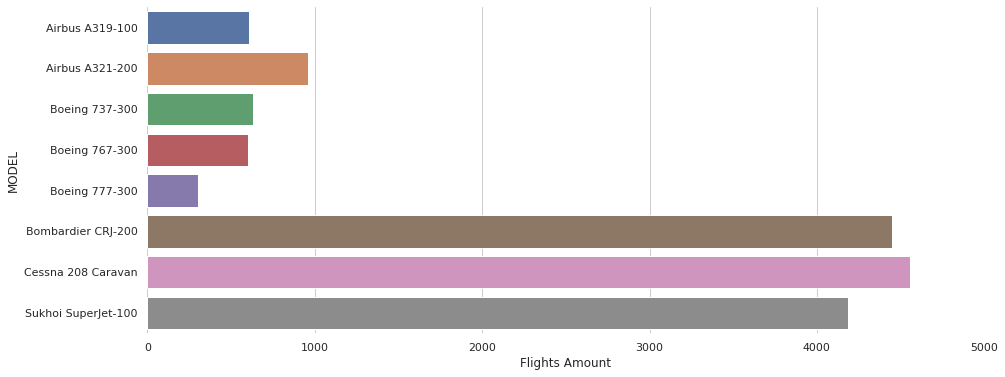

In [73]:
#data_aircraft.plot(kind ='bar' ,grid = True, figsize=(15, 5))
#Задаю стиль сетки
sns.set(style="whitegrid")
#Задаю размер графика
f, ax = plt.subplots(figsize=(15, 6))
#Рисую график
sns.barplot( x = 'flights_amount', y = 'model', data = data_aircraft, orient = 'h')
#Задаю названия осей
ax.set(xlim=(0, 5000), ylabel="MODEL",
       xlabel="Flights Amount")
sns.despine(left=True, bottom=True)

Данный график дает понять, что многие авиалинии осуществляют пассажирские перевозки за счет старых моделей самолетов и отечественных моделей самолетов.

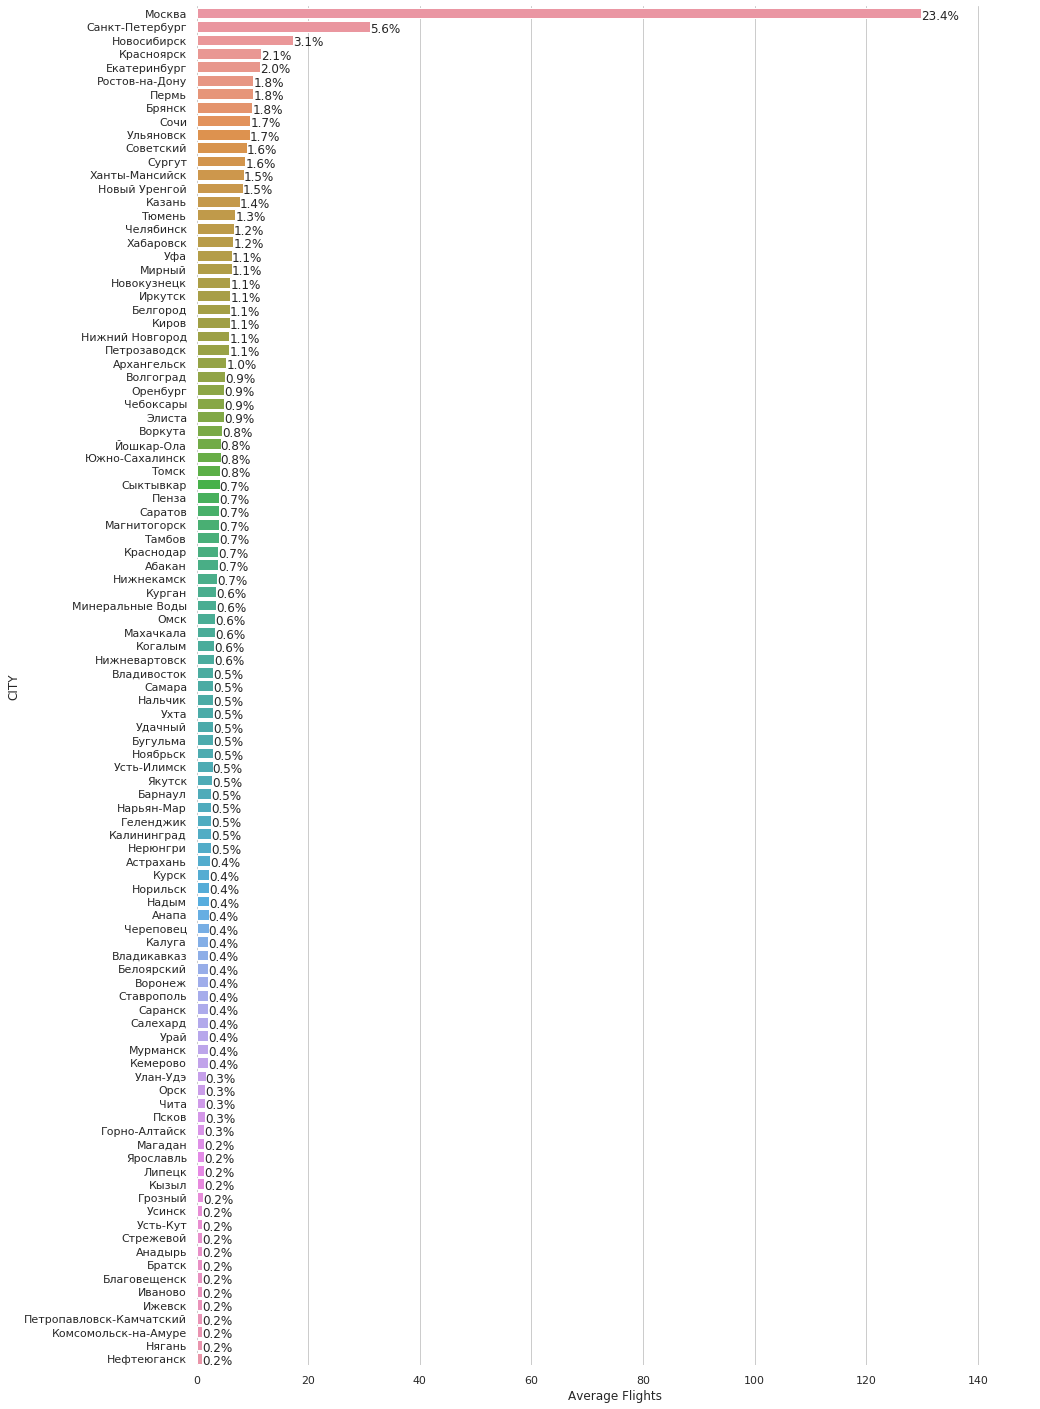

In [91]:
#Задаю стиль сетки
sns.set(style="whitegrid")
#Задаю размер графика
f, ax = plt.subplots(figsize=(15, 25))
#Рисую график
ax = sns.barplot( x = 'average_flights', y = 'city', data = data_flight, orient = 'h')
#Задаю названия осей
ax.set(xlim=(0, 150), ylabel="CITY",
       xlabel="Average Flights")
sns.despine(left=True, bottom=True)

#Добавляю значения в %
total = data_flight['average_flights'].sum().astype(int)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() + 0.02
        ax.annotate(percentage, (x, y))
   

Здесь подтверждается вывод для топ-10 городов, сделанный ранее. Города, которые территориально близки к ТОП-10, также отмечаются высоким среднем уровнем полетов.

### Шаг 5. Гипотезы

In [92]:
data_query_last = pd.read_csv('/datasets/query_last.csv')
data_query_last['festival_name'] = data_query_last['festival_name'].fillna('Без Фестиваля')
#data_query_last['festival_week'] = data_query_last['festival_week'].fillna(0.1) - Здесь хотел обозначить 0.1, как маркер для пропущенных
#значений, для дальнейшего расчета это не имеет смысла,так что уберу из вычислений
data_query_last

count_fest = data_query_last.query('festival_name in ["Park Live", "Видфест", "Пикник Афиша"]')
count_no_fest = data_query_last.query('festival_name == "Без Фестиваля"')

alpha = .05

results = st.ttest_ind(
    count_fest['ticket_amount'], 
    count_no_fest['ticket_amount'])

print('p-значение:', results.pvalue)

if results.pvalue  > alpha :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.046381480971335445
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

Альтернативная гипотеза, соответственно: Средний спрос на билеты во время фестивалей  отличается от среднего спроса на билеты в обычное время

Тест двусторонний.

### Шаг 6.Общий Вывод

    1) Количество рейсов больше всего наблюдается в крупных городах страны(с большей численностью населения, высоким уровнем инфраструктуры и тд)
    
    2) Многие авиалинии осуществляют пассажирские перевозки за счет старых моделей самолетов и отечественных моделей самолетов.
    
    3) Города, которые территориально близки к ТОП-10, также отмечаются высоким среднем уровнем полетов.
    
    4) Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время